# 【問題1】ジニ不純度を求める関数
- 簡単な例を作り、手計算と関数の結果を比較
- 例)学校A、Bそれぞれ100人ずつの計200人いる状態から、1つのルールで分割した場合  
データセットは下記
    - 学校Aで数学60点以上なのは60人
    - 学校Bで数学60点以上なのは30人
    - 学校Aで数学60点未満なのは40人
    - 学校Bで数学60点未満なのは70人

In [0]:
import numpy as np

def calc_gini_impurity(data):
    """
    分割ルールによって分割されたデータのサンプル数・ジニ不純度を返却する

     Parameters
    ----------
    data : 次の形のndarray, shape (n_classes,)
        分割ルールによって分割されたデータ    

     Returns
    -------
    gini_impurity : int
        ジニ不純度
    sample_lens : 次の形のndarray, shape (n_lengths,)
     """

    # ジニ不順度初期化
    gini_impurity = 0
    # サンプル数格納用配列初期化
    sample_lens = np.zeros(data.shape[0])

    # サンプル数をカウント
    for i in range(data.shape[0]):
        sample_lens[i] = len(data[i])

    # サンプル数からジニ不純度を計算
    gini_impurity = 1 -  (((sample_lens[0]/np.sum(sample_lens))**2 + (sample_lens[1]/np.sum(sample_lens))**2))

    return gini_impurity, sample_lens



print('手計算のやつ')
rule1_yes = 1 - ((60/90)**2 + (30/90)**2)
print(rule1_yes)

rule1_no = 1 - ((40/110)**2 + (70/110)**2)
print(rule1_no)

rule2_yes = 1 - ((80/100)**2 + (20/100)**2)
#print(rule2_yes)

rule2_no = 1 - ((20/100)**2 + (80/100)**2)
#print(rule2_no)


# ルール:数学で60点以上or未満
# 学校Aで数学60点以上なのは60人
A_school_yes = np.random.randint(60, 101, (60))
# 学校Bで数学60点以上なのは30人
B_school_yes = np.random.randint(60, 101, (30))
# 学校Aで数学60点未満なのは40人
A_school_no = np.random.randint(0, 60, (40))
# 学校Bで数学60点未満なのは70人
B_school_no = np.random.randint(0, 60, (70))

print()
print('関数のやつ')
# yesと判定
school_yes = np.array([A_school_yes, B_school_yes])
gini_impurity, sample_lens = calc_gini_impurity(school_yes)
print(gini_impurity)
print(sample_lens)

# noと判定
school_no = np.array([A_school_no, B_school_no])
gini_impurity, sample_lens = calc_gini_impurity(school_no)
print(gini_impurity)
print(sample_lens)

手計算のやつ
0.4444444444444444
0.4628099173553719

関数のやつ
0.4444444444444444
[60. 30.]
0.4628099173553719
[40. 70.]


# 【問題2】情報利得を求める関数
- 問題1の例を引き継ぐ

In [0]:
import numpy as np

def calc_information_gain(data_p, data_left, data_right):
    """
    親ノードと左右のノードのデータから情報利得を求める

     Parameters
    ----------
    data : 次の形のndarray, shape (n_classes,)
        分割ルールによって分割されたデータ    

     Returns
    -------
    gini_impurity : int
        ジニ不純度
     """
    
    # 親ノードのジニ不純度
    I_p,  sample_lens_p = calc_gini_impurity(data_p)
    
    # 左ノードのジニ不純度
    I_left, sample_lens_left = calc_gini_impurity(data_left)
    
    # 右ノードのジニ不純度
    I_right, sample_lens_right = calc_gini_impurity(data_right)
    
    # leftの項を計算
    term_left = np.sum(sample_lens_left) / np.sum(sample_lens_p) * I_left
    
    # rightの項を計算
    term_right = np.sum(sample_lens_right) / np.sum(sample_lens_p) * I_right

    information_gain = I_p - term_left - term_right
    return information_gain


print('ダイバーのやつ')
rule1 = 1- ((30/65) ** 2 + (35/65) ** 2)
rule1_yes = 1 - ((10/40)**2 + (30/40)**2)
rule1_no = 1 - ((20/25)**2 + (5/25)**2)

information_gain = rule1 - (40 / 65 * rule1_yes) - (25 / 65 * rule1_no)
print(information_gain)

print('手計算のやつ')
rule1 = 1- ((100/200) ** 2 + (100/200) ** 2)
rule1_yes = 1 - ((60/90)**2 + (30/90)**2)
rule1_no = 1 - ((40/110)**2 + (70/110)**2)

information_gain = rule1 - (90 / 200 * rule1_yes) - (110 / 200 * rule1_no)
print(information_gain)


print('関数のやつ')
# 数学のデータたち
A_school_yes = np.random.randint(60, 101, (60))
B_school_yes = np.random.randint(60, 101, (30))
A_school_no = np.random.randint(0, 60, (40))
B_school_no = np.random.randint(0, 60, (70))

# yesと判定
school_yes = np.array([A_school_yes, B_school_yes])

# noと判定
school_no = np.array([A_school_no, B_school_no])

# 親ノード A学校・B学校の作成
A_school = np.insert(A_school_yes, 0, A_school_no)
B_school = np.insert(B_school_yes, 0, B_school_no)
schools = np.array([A_school, B_school])

information_gain = calc_information_gain(schools, school_yes, school_no)
print(information_gain)

ダイバーのやつ
0.14319526627218937
手計算のやつ
0.04545454545454547
関数のやつ
0.04545454545454547


### 落書き
→ 各ノードでジニの最小を求める → 情報利得が最大化される?

In [0]:
rule1 = 1- ((50/150) ** 2 + (80/150)  ** 2 + (20/150) ** 2)
rule1_1 = 1 - ((50/50)**2 + (0/50)**2 +  (0/50)**2)
rule1_2 = 1 - ((0/80)**2 + (78/80)**2 +  (2/80)**2)
rule1_3 = 1 - ((0/20)**2 + (2/20)**2 +  (18/20)**2)

information_gain = rule1 - (50/150 * rule1_1) - (80/150 * rule1_2) - (20/150 * rule1_3) 
print(rule1)
print(rule1_1)
print(rule1_2)
print(rule1_3)
print(information_gain)

ary = [0, 1, 1, 2, 3, 3, 3, 4, 7, 100]

bincount = np.bincount(ary)
print(bincount)

mode = np.argmax(bincount)
print(mode)

ary = ['hoge', 'fuga', 'moge']

# 文字列はダメぽい
#np.argmax(np.bincount(ary))

ary = [1, 1, 1]

bincount = np.bincount(ary)
print(bincount)

mode = np.argmax(bincount)
print(mode)

0.5866666666666667
0.0
0.04875000000000007
0.17999999999999994
0.5366666666666666
[1 2 1 3 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
3
[0 3]
1


### 【問題3】深さ1の決定木分類器クラスの作成
### 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成
### 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成

- NumPyなど最低限のライブラリのみを使い、スクラッチで実装する。
- 下記ライブラリのfit〜predまでの実装をゴールとする。  
[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [0]:
import numpy as np

class ScratchDecesionTreeClassifier(object):
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    max_depth : int
      決定木の深さ
 
    Attributes
    ----------
    self.tree : object
      決定木インスタンス

    """
    def __init__(self, max_depth):
        # 木の深さの最大
        self.max_depth = max_depth
        # 木インスタンス格納用
        self.tree = None

        
    def fit(self, X, y):
        """
        決定木分類器を学習する。データを元にDecisionTreeNodeのインスタンスを作成し、指定の深さまでsplitしていく。

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        # 次元数を必要に応じて追加
        if X.ndim < 2:
            X = X[:, np.newaxis]
        if y.ndim < 2:
            y = y[:, np.newaxis]
        
        # ノードインスタンス作成
        self.tree = ScratchDecisionTreeNode(X, y, self.max_depth)
        # ノードインスタンスのsplitをコール
        self.tree.split()

        
    def predict(self, X):
        """
        決定木分類器を使い推定する。DecisionTreeNodeのpredictをコールし、ノードを元にラベルづけする

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
            
        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            決定木による推定結果
        """
        # 返却用配列初期化
        y_pred = []
        
        for X_row in X:
            y_pred.append(self.tree.predict(X_row))
        return np.array(y_pred)
    
    
class ScratchDecisionTreeNode(object):
    def __init__(self, X, y, max_depth):
        self.left_node = None                                   # split後の左ノードインスタンスを格納する
        self.right_node = None                                 # split後の左ノードインスタンスを格納する
        self.max_depth = max_depth
        self.depth = None                                         # 現ノード地点の深さ
        self.X = X
        self.y = y
        self.best_threshold = None                          # splitに使用する閾値
        self.best_feature_index = None
        self.gini_min = None                                      # ジニ不純度の最小値
        # TODO:文字列にも対応したい
        self.label = np.argmax(np.bincount(y.ravel()))       # 現ノードのラベル(最頻値を指定)

        
    def split(self, depth=0):
        """
        ノード分割関数。もっとも良い条件下で左右のノードにsplitし、各インスタンス作成。
        指定された深さorラベル分けが完了するまで再帰的に関数コールする。

          Parameters
        ----------
        depth : int
            現ノード地点の深さ
        """
        self.depth = depth
        self.gini_min, self.best_threshold, self.best_feature_index = self._search_best_threshold(self.X, self.y)
        print('Depth: {},  X[{}] >= {}, Samples: {}, Label: {}, Gini: {}'.format(self.depth, self.best_feature_index, self.best_threshold, len(self.X), self.label, self.gini_min))
        
        # 終了条件：ルートノードではなく、かつ深さが指定された最大の深さに到達したorジニ不純度が0になったら終了
        if self.depth != 0 and self.depth == self.max_depth or self.gini_min == 0:
            return
        
        # 閾値を元にsplitし、インデックスを保持
        left_idx = self.X[:, self.best_feature_index] >= self.best_threshold
        right_idx = self.X[:, self.best_feature_index] < self.best_threshold
        
        # インデックスが空でない場合
        if len(left_idx):
            # 下層ノードのインスタンス作成 インデックスを元にsplitしたX, yを送る
            self.left_node = ScratchDecisionTreeNode(self.X[left_idx],  self.y[left_idx], self.max_depth)
            # 深さを1段階深くしてさらにsplitコール
            self.left_node.split(self.depth +1)
        
        # 右も同様
        if len(right_idx):
            self.right_node = ScratchDecisionTreeNode(self.X[right_idx], self.y[right_idx], self.max_depth)
            self.right_node.split(self.depth +1)

        
    def _calc_gini_impurity(self, X, y, feat_idx, threshold):
        """
        渡されたデータのジニ不純度を計算する

          Parameters
        ----------
        X : 次の形のndarray, shape (1, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        feat_idx : int
            特徴量のインデックス
        threshold : float
            特徴量を区切る閾値
  
          Returns
        -------
        gini_impurity : float
            ジニ不純度
        """
        
        gini_impurity = 0                   # ジニ不純度初期化
        sample_num = len(y)            # sample数カウント

        # 閾値を元に二分割されたXの配列をそれぞれ格納する
        divided_y = [y[X[:, feat_idx] >= threshold], y[X[:, feat_idx] < threshold]]
        
        # TODO : もーちょい綺麗にかけそう
        # 分割された配列をループ処理
        for group in divided_y:
            score = 0
            # 配列内にあるクラスを取得
            classes = np.unique(group)
            # クラス数分ループ処理
            for cls in classes:
                # 分割された配列のうちクラスと一致するものをカウントし、総数で割る
                p = np.sum(group == cls) / len(group)
                score += p ** 2
                
            # ジニ不純度を足しあげる
            gini_impurity += (1- score) * (len(group) / sample_num)
            
        return gini_impurity

        
    def _search_best_threshold(self, X, y):
        """
        特徴量をループ処理し、閾値にふさわしい値を返却する

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
            
          Returns
        -------
        gini_min : float
            ジニ不純度の最小値
        best_threshold : float
            ジニ不純度の最小値の時の閾値
        best_feature_index : int
            ジニ不純度の最小値の時に選択した特徴量のインデックス
        """
        
        # TODO : もーちょい綺麗にかけそう
        features = X.shape[1]      # feature数取得
        best_threshold = None 
        best_feature_index = None
        gini = None 
        gini_min = 1

        # feature数ぶんループ
        for feat_idx in range(features):
            values = X[:, feat_idx]    # Xのvalueを行方向に取得
            
            for val in values:
                # ジニ不順度計算関数コール
                gini = self._calc_gini_impurity(X, y, feat_idx, val)
                
                # ジニ不順度が低かったら各種値を更新
                if gini_min > gini:
                    gini_min = gini                       # ジニ不順度の一番低い値
                    best_threshold = val            # ジニ不順度が一番低い値時の閾値
                    best_feature_index = feat_idx     # 採用したfeature 

        return gini_min, best_threshold, best_feature_index

    
    def predict(self, X):
        """
        リーフになるまで再帰的にコールし、ラベルを返却する

          Parameters
        ----------
        X : 次の形のndarray, shape (1, n_features)
            学習用データの特徴量
            
          Returns
        -------
        self.label : float
            リーフのラベル(最頻値を指定)
        """
            
        # ジニ不純度が0or深さが最大値に到達したら、そのリーフのラベルを返却
        if self.gini_min == 0.0 or self.depth == self.max_depth:
            return self.label
        
        # そうでない場合はXの値に応じて下層に進んでいく
        else:
            if X[self.best_feature_index] > self.best_threshold:
                return self.left_node.predict(X)
            else:
                return self.right_node.predict(X)

In [0]:
# 使ってみる

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

# Sepal length と Sepal width だけを特徴量として使う
X = X[:, :2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

sdtc = ScratchDecesionTreeClassifier(4)
sdtc.fit(X_train, y_train)

y_pred = sdtc.predict(X_test)

Depth: 0,  X[0] >= 5.5, Samples: 112, Label: 2, Gini: 0.4170817588457575
Depth: 1,  X[0] >= 6.2, Samples: 71, Label: 2, Gini: 0.4012898942476408
Depth: 2,  X[0] >= 7.1, Samples: 44, Label: 2, Gini: 0.3168044077134986
Depth: 3,  X[0] >= 7.4, Samples: 11, Label: 2, Gini: 0.0
Depth: 3,  X[1] >= 2.5, Samples: 33, Label: 2, Gini: 0.39204545454545453
Depth: 4,  X[0] >= 6.6, Samples: 32, Label: 2, Gini: 0.3896761133603238
Depth: 4,  X[0] >= 6.3, Samples: 1, Label: 1, Gini: 0.0
Depth: 2,  X[1] >= 4.0, Samples: 27, Label: 1, Gini: 0.37333333333333335
Depth: 3,  X[0] >= 5.8, Samples: 2, Label: 0, Gini: 0.0
Depth: 3,  X[0] >= 5.8, Samples: 25, Label: 1, Gini: 0.3470129870129871
Depth: 4,  X[1] >= 3.0, Samples: 14, Label: 1, Gini: 0.45714285714285713
Depth: 4,  X[0] >= 5.7, Samples: 11, Label: 1, Gini: 0.15151515151515146
Depth: 1,  X[1] >= 2.9, Samples: 41, Label: 0, Gini: 0.08644986449864508
Depth: 2,  X[0] >= 5.4, Samples: 36, Label: 0, Gini: 0.044444444444444425
Depth: 3,  X[1] >= 3.4, Samples

# 【問題6】指標値の算出

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

[[11  2  0]
 [ 0 13  4]
 [ 0  3  5]]
0.7631578947368421


# 【問題7】決定領域の可視化

In [0]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, target_names, resolution=0.01, threshold=0.5, alpha=0.5):
    """
    ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
    背景の色が学習したモデルによる推定値から描画される
    散布図の点は学習用のデータである。
    
    Parameters
    ---------------
    X_train: ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train: ndarray, shape(n_samples,)
        学習用データの正解値
    model: object
        学習したモデルのインスタンスを入れる
    step: float, (default: 0.1)
        推定値を計算する間隔を設定する
    title: str
        グラフのタイトルの文章を与える
    xlabel, ylabel: str
        軸ラベルの文章を与える
    target_names=: list of str
        凡例の一覧を与える
    ---------------
    """
    # setting
    markers = ('*', '*', '*')
    scatter_colors = ['red', 'blue', 'green']
    cmap = ListedColormap(('pink', 'skyblue', 'lightgreen'))
    n_class = 3

    # 2変数の入力データの最小値から最大値まで引数resolutionの幅でメッシュを描く
    X1_mesh, X2_mesh = np.meshgrid(np.arange(np.min(X_train[:, 0]) - threshold, np.max(X_train[:, 0]) + threshold, resolution), np.arange(np.min(X_train[:, 1]) - threshold, np.max(X_train[:, 1]) + threshold, resolution))

    # 予想結果を元のグリッドポイントのデータサイズに変換
    mesh = np.c_[np.ravel(X1_mesh), np.ravel(X2_mesh)]
    z = model.predict(mesh).reshape(X1_mesh.shape)
    
    # メッシュデータと分離クラスを使って決定境界を描いている
    plt.contourf(X1_mesh, X2_mesh, z, n_class-1, cmap=cmap)
    plt.xlim(X1_mesh.min(), X1_mesh.max())
    plt.ylim(X2_mesh.min(), X2_mesh.max())

    for i, target in enumerate(set(np.unique(y_train))):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_colors[i], label=target_names[i], marker=markers[i])
        patches = [mpatches.Patch(color=scatter_colors[i], label=target_names[i]) for i in range(n_class)]
        plt.legend(handles=patches)
        plt.legend()
        plt.show

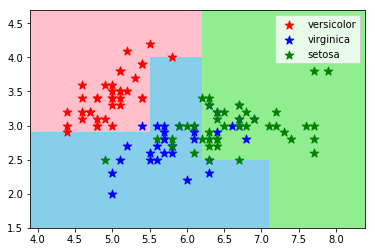

In [0]:
decision_region(X_train, y_train, sdtc, target_names=['versicolor', 'virginica', 'setosa'])

# 【問題8】決定木の利用場面
- 知識がない第三者にも説明しやすい！！  
- scikit-learn には決定木の構造を DOT 言語で出力する機能があるらしい
-  DOT 言語を画像に変換する素晴らしい奴もあるらしい  
- 下記をインストール  
brew install graphviz 

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()

X = iris.data
y = iris.target

# Sepal length と Sepal width だけを特徴量として使う
X = X[:, :2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# DOT 言語のフォーマットで決定木の形を出力する
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz(clf, out_file=f)

- iris-dtree.dotができるので、同ディレクトリで下記を実行  
$ dot -T png iris-dtree.dot -o iris-dtree.png  
→ ツリーのpngが出来上がる
<img src="iris-dtree.png">

アトリビュートをsklearnと揃えればスクラッチでも作れそう  
→ やって~~みる~~みない